# <b><span style='color:#F1A424'>AutoML - Multiclass Classification - Glass Type Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used : Glass Type Dataset**

**Features**:
- `Id number`: 1 to 214 (removed from CSV file)
- `RI`: refractive index
- `Na`: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- `Mg`: Magnesium
- `Al`: Aluminum
- `Si`: Silicon
- `K`: Potassium
- `Ca`: Calcium
- `Ba`: Barium
- `Fe`: Iron

**Target Variable**:
- `Type of glass`: (class attribute)
  - 1 building_windows_float_processed
  - 2 building_windows_non_float_processed
  - 3 vehicle_windows_float_processed
  - 4 vehicle_windows_non_float_processed (none in this database)
  - 5 containers
  - 6 tableware
  - 7 headlamps

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the type of glass.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.


In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','glass_types')

In [5]:
# Fetching in teradata dataframe
glass_df = DataFrame("glass_types")

In [6]:
# first 5 rows
glass_df.head()

ri,na,mg,ai,si,k,ca,ba,fe,gtype
1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.0,0.31,1
1.51316,13.02,0.0,3.04,70.48,6.21,6.96,0.0,0.0,5
1.51321,13.0,0.0,3.02,70.7,6.21,6.93,0.0,0.0,5
1.51409,14.25,3.09,2.08,72.28,1.1,7.08,0.0,0.0,2
1.51514,14.01,2.68,3.5,69.89,1.68,5.87,2.2,0.0,5
1.51514,14.85,0.0,2.42,73.72,0.0,8.39,0.56,0.0,7
1.51508,15.15,0.0,2.25,73.5,0.0,8.34,0.63,0.0,7
1.51299,14.4,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6
1.51131,13.69,3.2,1.81,72.81,1.76,5.43,1.19,0.0,7
1.51115,17.38,0.0,0.34,75.41,0.0,6.65,0.0,0.0,6


In [7]:
# glass_df dataset
glass_df.shape

(214, 10)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
glass_df_sample = glass_df.sample(frac = [0.8, 0.2])

In [9]:
glass_df_sample.head()

ri,na,mg,ai,si,k,ca,ba,fe,gtype,sampleid
1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.0,0.31,1,1
1.51316,13.02,0.0,3.04,70.48,6.21,6.96,0.0,0.0,5,1
1.51321,13.0,0.0,3.02,70.7,6.21,6.93,0.0,0.0,5,1
1.51409,14.25,3.09,2.08,72.28,1.1,7.08,0.0,0.0,2,1
1.51514,14.01,2.68,3.5,69.89,1.68,5.87,2.2,0.0,5,2
1.51514,14.85,0.0,2.42,73.72,0.0,8.39,0.56,0.0,7,1
1.51508,15.15,0.0,2.25,73.5,0.0,8.34,0.63,0.0,7,1
1.51299,14.4,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6,1
1.51131,13.69,3.2,1.81,72.81,1.76,5.43,1.19,0.0,7,1
1.51115,17.38,0.0,0.34,75.41,0.0,6.65,0.0,0.0,6,2


In [10]:
# Fetching train and test data
glass_df_train= glass_df_sample[glass_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
glass_df_test = glass_df_sample[glass_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
glass_df_train.shape

(171, 10)

In [12]:
# test data shape
glass_df_test.shape

(43, 10)

In [13]:
#train dataset
glass_df_train.head()

ri,na,mg,ai,si,k,ca,ba,fe,gtype
1.51299,14.4,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6
1.51321,13.0,0.0,3.02,70.7,6.21,6.93,0.0,0.0,5
1.51409,14.25,3.09,2.08,72.28,1.1,7.08,0.0,0.0,2
1.51508,15.15,0.0,2.25,73.5,0.0,8.34,0.63,0.0,7
1.51531,14.38,0.0,2.66,73.1,0.04,9.08,0.64,0.0,7
1.51545,14.14,0.0,2.68,73.39,0.08,9.07,0.61,0.05,7
1.51514,14.85,0.0,2.42,73.72,0.0,8.39,0.56,0.0,7
1.51316,13.02,0.0,3.04,70.48,6.21,6.96,0.0,0.0,5
1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.0,0.31,1
1.51131,13.69,3.2,1.81,72.81,1.76,5.43,1.19,0.0,7


In [14]:
# test dataset
glass_df_test.head()

ri,na,mg,ai,si,k,ca,ba,fe,gtype
1.51569,13.24,3.49,1.47,73.25,0.38,8.03,0.0,0.0,2
1.5159,13.24,3.34,1.47,73.1,0.39,8.22,0.0,0.0,2
1.51593,13.09,3.59,1.52,73.1,0.67,7.83,0.0,0.0,2
1.51594,13.09,3.52,1.55,72.87,0.68,8.05,0.0,0.09,2
1.51645,13.4,3.49,1.52,72.65,0.67,8.08,0.0,0.1,2
1.51651,14.38,0.0,1.94,73.61,0.0,8.48,1.57,0.0,7
1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.0,3
1.51571,12.72,3.46,1.56,73.2,0.67,8.09,0.0,0.24,1
1.51514,14.01,2.68,3.5,69.89,1.68,5.87,2.2,0.0,5
1.51115,17.38,0.0,0.34,75.41,0.0,6.65,0.0,0.0,6


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoML instance with task type 'Classification'
# Using only 'decision_forest' and 'xgboost' models from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-F1', early stopping timer threshold to 100 sec
# and verbose level 2 for detailed loggging

aml = AutoML(task_type="Classification",
             include=['decision_forest', 'xgboost'],
             stopping_metric='MICRO-F1',
             stopping_tolerance=0.60,
             max_runtime_secs=100,
             verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 171
Total Columns in the data: 10

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
ca,FLOAT,171,0,None,0,171,0,0.0,100.0
ba,FLOAT,171,0,None,140,31,0,0.0,100.0
ri,FLOAT,171,0,None,0,171,0,0.0,100.0
na,FLOAT,171,0,None,0,171,0,0.0,100.0
k,FLOAT,171,0,None,24,147,0,0.0,100.0
fe,FLOAT,171,0,None,118,53,0,0.0,100.0
mg,FLOAT,171,0,None,33,138,0,0.0,100.0
si,FLOAT,171,0,None,0,171,0,0.0,100.0
gtype,INTEGER,171,0,None,0,171,0,0.0,100.0
ai,FLOAT,171,0,None,0,171,0,0.0,100.0



Statistics of Data:


func,ri,na,mg,ai,si,k,ca,ba,fe,gtype
min,1.511,10.73,0,0.29,69.81,0,5.43,0,0,1
std,0.003,0.803,1.431,0.495,0.764,0.712,1.482,0.494,0.091,2.111
25%,1.516,12.895,2.195,1.19,72.335,0.12,8.24,0,0,1
50%,1.518,13.29,3.48,1.38,72.81,0.55,8.58,0,0,2
75%,1.519,13.82,3.585,1.635,73.08,0.61,9.145,0,0.09,3
max,1.534,15.79,3.98,3.04,75.18,6.21,16.19,3.15,0.37,7
mean,1.518,13.381,2.682,1.455,72.649,0.508,8.974,0.172,0.052,2.795
count,171,171,171,171,171,171,171,171,171,171



Target Column Distribution:


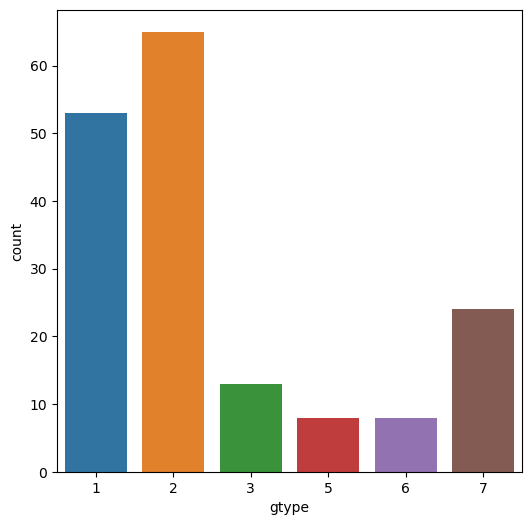

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0         si           6.432749
1         na           3.508772
2         mg          19.298246
3          k           3.508772
4         ca          12.280702
5         ri           8.771930
6         fe           8.771930
7         ba          18.128655
8         ai           8.187135
9      gtype          14.035088


Analysis completed. No action taken.                                                    


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


Analysis completed. No categorical columns were found.                                   


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


ri,na,mg,ai,si,k,ca,ba,fe,gtype,id
1.51709,13.0,3.47,1.79,72.72,0.66,8.18,0.0,0.0,2,11
1.5169,13.33,3.54,1.61,72.54,0.68,8.11,0.0,0.0,2,13
1.5167,13.24,3.57,1.38,72.7,0.56,8.44,0.0,0.1,3,21
1.52177,13.75,1.01,1.36,72.19,0.33,11.14,0.0,0.0,2,10
1.51784,12.68,3.67,1.16,73.11,0.61,8.7,0.0,0.0,1,12
1.51784,13.08,3.49,1.28,72.86,0.6,8.49,0.0,0.0,1,20
1.51674,12.87,3.56,1.64,73.14,0.65,7.99,0.0,0.0,2,15
1.51674,12.79,3.52,1.54,73.36,0.66,7.9,0.0,0.0,2,23
1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.0,0.15,2,9
1.51629,12.71,3.33,1.49,73.28,0.67,8.24,0.0,0.0,2,17


ri,na,mg,ai,si,k,ca,ba,fe,gtype,id
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,28
1.51743,12.2,3.25,1.16,73.55,0.62,8.9,0.0,0.24,2,29
1.51926,13.2,3.33,1.28,72.36,0.6,9.14,0.0,0.11,1,125
1.51574,14.86,3.67,1.74,71.87,0.16,7.36,0.0,0.12,2,30
1.51829,14.46,2.24,1.62,72.38,0.0,9.26,0.0,0.0,6,31
1.51779,13.64,3.65,0.65,73.0,0.06,8.93,0.0,0.0,3,103
1.52227,14.17,3.81,0.78,71.35,0.0,9.69,0.0,0.0,1,27
1.51778,13.21,2.81,1.29,72.98,0.51,9.02,0.0,0.09,1,123
1.51763,12.8,3.66,1.27,73.01,0.6,8.56,0.0,0.0,1,86
1.51685,14.92,0.0,1.99,73.06,0.0,8.4,1.59,0.0,7,116


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0          k           3.508772
1         si           6.432749
2         ba          18.128655
3         ri           8.771930
4         ai           8.187135
5      gtype          14.035088
6         ca          12.280702
7         fe           8.771930
8         mg          19.298246
9         na           3.508772


['na', 'si', 'k']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719256027876398"' - 7/16


ri,na,mg,ai,si,k,ca,ba,fe,gtype,id
1.51674,12.79,3.52,1.54,73.36,0.66,7.9,0.0,0.0,2,23
1.51709,13.0,3.47,1.79,72.72,0.66,8.18,0.0,0.0,2,11
1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.0,0.0,2,35
1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.0,1,22
1.52177,13.2,3.68,1.15,72.75,0.54,8.52,0.0,0.0,2,18
1.52177,13.75,1.01,1.36,72.19,0.33,11.14,0.0,0.0,2,10
1.5169,13.33,3.54,1.61,72.54,0.68,8.11,0.0,0.0,2,13
1.5167,13.24,3.57,1.38,72.7,0.56,8.44,0.0,0.1,3,21
1.51784,12.68,3.67,1.16,73.11,0.61,8.7,0.0,0.0,1,12
1.51784,13.08,3.49,1.28,72.86,0.6,8.49,0.0,0.0,1,20


['ca', 'ai', 'ri', 'mg', 'ba', 'fe']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260539936508"' - 7/16


ri,na,mg,ai,si,k,ca,ba,fe,gtype,id
1.51618,13.01,3.5,1.48,72.89,0.6,8.12,0.0,0.0,2,36
1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.0,0.0,2,52
1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.0,0.0,1,60
1.51609,15.01,3.5,1.355,73.05,0.05,8.83,0.0,0.0,7,76
1.51783,12.69,3.54,1.34,72.95,0.57,8.75,0.0,0.0,1,92
1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.0,2,100
1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.0,0.22,1,84
1.519,13.49,3.48,1.35,71.95,0.55,9.0,0.0,0.0,1,44
1.51784,12.68,3.67,1.16,73.11,0.61,8.7,0.0,0.0,1,12
1.51784,13.08,3.49,1.28,72.86,0.6,8.49,0.0,0.0,1,20


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259031072069"' - 8/16
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719254631793604"'


['ca', 'ai', 'fe', 'k', 'mg', 'na', 'si', 'ri']


['ca', 'ai', 'fe', 'k', 'mg', 'na', 'si', 'ri']


id,gtype,ca,ai,fe,k,mg,na,si,ri
2,7,0.6440129449838189,0.48581560283687936,0.2,0.07272727272727272,0.7818181818181817,0.7478260869565219,0.8365758754863811,0.16250000000000972
4,3,0.5533980582524269,0.602836879432624,0.0,0.5272727272727272,0.7409090909090909,0.5710144927536229,0.3112840466926105,0.4625000000000042
5,3,0.5857605177993529,0.05673758865248223,0.96,0.14545454545454545,0.7999999999999999,0.6028985507246378,0.5486381322957224,0.6500000000000111
6,1,0.47572815533980606,0.3333333333333332,0.0,0.5090909090909091,0.7818181818181817,0.3710144927536231,0.7898832684824885,0.4250000000000083
8,1,0.7508090614886732,0.3191489361702128,0.0,0.0818181818181818,0.8227272727272725,0.617391304347826,0.28015564202334503,0.8624999999999875
9,1,0.6440129449838189,0.43262411347517726,0.0,0.5,0.4818181818181817,0.45797101449275374,0.6264591439688696,0.5374999999999959
7,7,0.7669902912621357,0.48581560283687936,0.0,0.0,0.7818181818181817,0.8144927536231882,0.6264591439688696,0.2874999999999958
3,1,0.4401294498381875,0.7234042553191489,0.28,0.4909090909090909,0.7999999999999999,0.42318840579710126,0.5797665369649824,0.4000000000000111
1,2,0.3754045307443366,0.5815602836879432,0.0,0.6090909090909091,0.7045454545454545,0.3333333333333335,0.793774319066148,0.27499999999999725
0,7,0.5663430420711975,0.48581560283687936,0.0,0.045454545454545456,0.7818181818181817,1.0,0.7042801556420222,0.25


id,gtype,ca,ai,fe,k,mg,na,si,ri
110,7,-0.41747572815533984,1.0992907801418441,0.0,1.3272727272727272,0.6727272727272726,0.8000000000000002,0.003891050583659567,0.5374999999999959
135,7,0.38834951456310657,0.9361702127659572,0.0,0.0,-0.8090909090909091,0.9391304347826089,0.7276264591439685,0.31249999999999306
196,2,1.2653721682847898,-0.07801418439716311,0.0,0.0,-0.8090909090909091,0.6260869565217393,1.2490272373540852,0.5124999999999986
141,1,0.39482200647249216,0.49645390070921985,0.0,0.5090909090909091,0.8181818181818181,0.7188405797101447,0.32684824902723775,0.6375000000000125
151,2,0.38834951456310657,0.4680851063829787,0.0,0.4636363636363636,0.9590909090909091,0.5362318840579711,0.4435797665369639,0.5499999999999945
143,1,0.517799352750809,0.48226950354609927,0.0,0.5818181818181818,0.7727272727272726,0.34202898550724636,0.6692607003891027,0.4875000000000014
133,3,0.42071197411003264,0.7730496453900707,0.68,0.5454545454545454,0.7590909090909091,0.45797101449275374,0.482490272373543,0.3249999999999917
122,2,0.30744336569579267,0.6737588652482269,0.84,0.5818181818181818,0.7999999999999999,0.3971014492753622,0.6692607003891027,0.31249999999999306
123,1,0.6278317152103559,0.43971631205673756,0.36,0.4636363636363636,0.46818181818181814,0.4782608695652176,0.6770428015564218,0.4625000000000042
26,2,0.36569579288025916,0.6170212765957446,0.6,0.4909090909090909,0.9772727272727274,0.6231884057971017,0.22178988326848473,0.4875000000000014


['ri', 'na', 'mg', 'ai', 'si', 'k', 'ca', 'fe']


['r_ri', 'r_na', 'r_mg', 'r_ai', 'r_si', 'r_k', 'r_ca', 'r_fe']


id,gtype,r_ri,r_na,r_mg,r_ai,r_si,r_k,r_ca,r_fe
2,7,0.16250000000000972,0.7478260869565219,0.7818181818181817,0.48581560283687936,0.8365758754863811,0.07272727272727272,0.6440129449838189,0.2
4,3,0.4625000000000042,0.5710144927536229,0.7409090909090909,0.602836879432624,0.3112840466926105,0.5272727272727272,0.5533980582524269,0.0
5,3,0.6500000000000111,0.6028985507246378,0.7999999999999999,0.05673758865248223,0.5486381322957224,0.14545454545454545,0.5857605177993529,0.96
6,1,0.4250000000000083,0.3710144927536231,0.7818181818181817,0.3333333333333332,0.7898832684824885,0.5090909090909091,0.47572815533980606,0.0
8,1,0.8624999999999875,0.617391304347826,0.8227272727272725,0.3191489361702128,0.28015564202334503,0.0818181818181818,0.7508090614886732,0.0
9,1,0.5374999999999959,0.45797101449275374,0.4818181818181817,0.43262411347517726,0.6264591439688696,0.5,0.6440129449838189,0.0
7,7,0.2874999999999958,0.8144927536231882,0.7818181818181817,0.48581560283687936,0.6264591439688696,0.0,0.7669902912621357,0.0
3,1,0.4000000000000111,0.42318840579710126,0.7999999999999999,0.7234042553191489,0.5797665369649824,0.4909090909090909,0.4401294498381875,0.28
1,2,0.27499999999999725,0.3333333333333335,0.7045454545454545,0.5815602836879432,0.793774319066148,0.6090909090909091,0.3754045307443366,0.0
0,7,0.25,1.0,0.7818181818181817,0.48581560283687936,0.7042801556420222,0.045454545454545456,0.5663430420711975,0.0


id,gtype,r_ri,r_na,r_mg,r_ai,r_si,r_k,r_ca,r_fe
110,7,0.5374999999999959,0.8000000000000002,0.6727272727272726,1.0992907801418441,0.003891050583659567,1.3272727272727272,-0.41747572815533984,0.0
135,7,0.31249999999999306,0.9391304347826089,-0.8090909090909091,0.9361702127659572,0.7276264591439685,0.0,0.38834951456310657,0.0
196,2,0.5124999999999986,0.6260869565217393,-0.8090909090909091,-0.07801418439716311,1.2490272373540852,0.0,1.2653721682847898,0.0
141,1,0.6375000000000125,0.7188405797101447,0.8181818181818181,0.49645390070921985,0.32684824902723775,0.5090909090909091,0.39482200647249216,0.0
151,2,0.5499999999999945,0.5362318840579711,0.9590909090909091,0.4680851063829787,0.4435797665369639,0.4636363636363636,0.38834951456310657,0.0
143,1,0.4875000000000014,0.34202898550724636,0.7727272727272726,0.48226950354609927,0.6692607003891027,0.5818181818181818,0.517799352750809,0.0
133,3,0.3249999999999917,0.45797101449275374,0.7590909090909091,0.7730496453900707,0.482490272373543,0.5454545454545454,0.42071197411003264,0.68
122,2,0.31249999999999306,0.3971014492753622,0.7999999999999999,0.6737588652482269,0.6692607003891027,0.5818181818181818,0.30744336569579267,0.84
123,1,0.4625000000000042,0.4782608695652176,0.46818181818181814,0.43971631205673756,0.6770428015564218,0.4636363636363636,0.6278317152103559,0.36
26,2,0.4875000000000014,0.6231884057971017,0.9772727272727274,0.6170212765957446,0.22178988326848473,0.4909090909090909,0.36569579288025916,0.6


['ri', 'na', 'mg', 'ai', 'si', 'k', 'ca', 'fe']


id,ba,gtype,ri,na,mg,ai,si,k,ca,fe
8,0.0,3,0.3544776119402988,0.37681159420289834,0.8181818181818181,0.45390070921985815,0.5330739299610897,0.5545454545454545,0.5533980582524269,0.0
10,0.0,2,0.9552238805970257,0.6347826086956522,0.7818181818181817,0.48936170212765956,0.36964980544747084,0.3,0.48705501618123004,0.0
18,0.0,2,0.9552238805970257,0.47536231884057945,0.8636363636363636,0.3404255319148935,0.5875486381322961,0.4909090909090909,0.466019417475728,0.0
20,0.0,1,0.46641791044777614,0.4405797101449275,0.7772727272727273,0.43262411347517726,0.6303501945525292,0.5454545454545454,0.45631067961165056,0.0
9,0.0,2,0.5373134328358303,0.42318840579710126,0.8363636363636363,0.276595744680851,0.4280155642023367,0.5818181818181818,0.6634304207119743,0.6
17,0.0,2,0.27363184079601577,0.3333333333333335,0.7045454545454545,0.5815602836879432,0.793774319066148,0.6090909090909091,0.3754045307443366,0.0
22,0.0,1,0.43159203980100297,0.46086956521739136,0.8318181818181817,0.2695035460992908,0.7782101167315153,0.5181818181818181,0.3754045307443366,0.0
38,0.0,7,0.3855721393034931,0.9246376811594204,0.7818181818181817,0.9432624113475176,0.692607003891049,0.0,0.4692556634304205,0.32
13,0.0,2,0.34950248756218444,0.5130434782608696,0.7999999999999999,0.6666666666666666,0.5058365758754894,0.6181818181818182,0.33333333333333315,0.0
21,0.0,3,0.32462686567164006,0.48695652173913045,0.8136363636363635,0.50354609929078,0.5680933852140092,0.5090909090909091,0.4401294498381875,0.4


id,ba,gtype,ri,na,mg,ai,si,k,ca,fe
29,0.0,2,0.4154228855721519,0.1855072463768113,0.6681818181818181,0.3475177304964538,0.898832684824901,0.5636363636363636,0.5889967637540454,0.96
31,0.0,6,0.5223880597014872,0.8405797101449278,0.20909090909090916,0.6737588652482269,0.4435797665369639,0.0,0.7055016181229773,0.0
103,0.0,3,0.4601990049751262,0.6028985507246378,0.8499999999999999,-0.01418439716312058,0.6848249027237354,0.054545454545454536,0.5987055016181229,0.0
30,0.0,2,0.20522388059703256,0.9565217391304347,0.859090909090909,0.7588652482269501,0.24513618677043106,0.14545454545454545,0.09061488673139168,0.48
26,0.0,2,0.4863184079602061,0.6231884057971017,0.9772727272727274,0.6170212765957446,0.22178988326848473,0.4909090909090909,0.36569579288025916,0.6
114,0.69,1,0.7064676616915543,0.6521739130434784,0.8181818181818181,0.4609929078014184,0.1867704280155652,0.10909090909090907,0.5145631067961165,0.0
27,0.0,1,1.0174129353233865,0.7565217391304347,0.9227272727272727,0.07801418439716311,0.04280155642023312,0.0,0.8446601941747571,0.0
123,0.0,1,0.45895522388059073,0.4782608695652176,0.46818181818181814,0.43971631205673756,0.6770428015564218,0.4636363636363636,0.6278317152103559,0.36
86,0.0,1,0.4402985074626963,0.35942028985507257,0.8545454545454545,0.42553191489361697,0.688715953307395,0.5454545454545454,0.4789644012944985,0.0
125,0.0,1,0.6430348258706577,0.47536231884057945,0.7045454545454545,0.43262411347517726,0.4357976653696503,0.5454545454545454,0.6666666666666669,0.44


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5']


response_column : gtype                                                                                                                               
name : xgboost
model_type : Classification
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.3)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
iter_num : (10, 20, 30)
seed : 42
Total number of models for xgboost : 2592
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : gtype
name : decision_forest
tree_type : Classification
min_impurity : (0.0, 0.1, 0.2)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
num_trees : (-1, 20, 30)
seed : 42
Total number of models for decision_forest : 108
-----------------------------------------------------------------------------------------------------------------

result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719255532986096"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719254719299697"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719255036325012"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719258962426381"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719255037205335"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719256135304803"'


,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,XGBOOST_1,rfe,0.685714,0.685714,0.685714,0.685714,0.733333,0.596581,0.618539,0.720000,0.685714,0.679993
1,2,XGBOOST_4,rfe,0.685714,0.685714,0.685714,0.685714,0.733333,0.596581,0.618539,0.720000,0.685714,0.679993
2,3,DECISIONFOREST_3,lasso,0.628571,0.628571,0.628571,0.628571,0.558201,0.641026,0.566155,0.599773,0.628571,0.589001
3,4,DECISIONFOREST_1,rfe,0.571429,0.571429,0.571429,0.571429,0.614583,0.541026,0.536159,0.626786,0.571429,0.572250
4,5,DECISIONFOREST_0,lasso,0.542857,0.542857,0.542857,0.542857,0.602381,0.594872,0.570679,0.608163,0.542857,0.553704
5,6,XGBOOST_2,pca,0.542857,0.542857,0.542857,0.542857,0.347222,0.485897,0.377879,0.480952,0.542857,0.496935
6,7,XGBOOST_5,pca,0.542857,0.542857,0.542857,0.542857,0.347222,0.485897,0.377879,0.480952,0.542857,0.496935
7,8,DECISIONFOREST_2,pca,0.542857,0.542857,0.542857,0.542857,0.286147,0.337179,0.292063,0.455659,0.542857,0.464218


In [16]:
# Fitting train data
aml.fit(glass_df_train, glass_df_train.gtype)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,XGBOOST_1,rfe,0.685714,0.685714,0.685714,0.685714,0.733333,0.596581,0.618539,0.720000,0.685714,0.679993
1,2,XGBOOST_4,rfe,0.685714,0.685714,0.685714,0.685714,0.733333,0.596581,0.618539,0.720000,0.685714,0.679993
2,3,DECISIONFOREST_3,lasso,0.628571,0.628571,0.628571,0.628571,0.558201,0.641026,0.566155,0.599773,0.628571,0.589001
3,4,DECISIONFOREST_1,rfe,0.571429,0.571429,0.571429,0.571429,0.614583,0.541026,0.536159,0.626786,0.571429,0.572250
4,5,DECISIONFOREST_0,lasso,0.542857,0.542857,0.542857,0.542857,0.602381,0.594872,0.570679,0.608163,0.542857,0.553704
5,6,XGBOOST_2,pca,0.542857,0.542857,0.542857,0.542857,0.347222,0.485897,0.377879,0.480952,0.542857,0.496935
6,7,XGBOOST_5,pca,0.542857,0.542857,0.542857,0.542857,0.347222,0.485897,0.377879,0.480952,0.542857,0.496935
7,8,DECISIONFOREST_2,pca,0.542857,0.542857,0.542857,0.542857,0.286147,0.337179,0.292063,0.455659,0.542857,0.464218


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,Accuracy,Micro-Precision,Micro-Recall,Micro-F1,Macro-Precision,Macro-Recall,Macro-F1,Weighted-Precision,Weighted-Recall,Weighted-F1
0,1,XGBOOST_1,rfe,0.685714,0.685714,0.685714,0.685714,0.733333,0.596581,0.618539,0.72,0.685714,0.679993


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(glass_df_test,2)

Data Transformation started ...


ca,ai,fe,k,mg,na,id,si,ri,ba,gtype
10.17,1.83,0.0,0.97,0.0,12.86,8,73.88,1.51666,0.0,5
8.17,1.14,0.0,0.58,3.6,13.3,13,73.09,1.51743,0.0,1
8.03,1.53,0.29,0.65,3.64,13.3,21,72.53,1.51673,0.0,2
8.83,1.18,0.16,0.57,3.37,13.19,15,72.72,1.51869,0.0,1
9.85,0.87,0.17,0.19,3.65,13.05,14,72.22,1.52152,0.0,1
9.7,2.17,0.51,0.76,1.61,12.85,22,72.18,1.52058,0.24,5
8.91,1.23,0.0,0.59,3.35,13.58,11,72.08,1.51898,0.0,1
8.69,1.3,0.14,0.61,3.56,12.65,19,73.08,1.51768,0.0,1
8.48,1.94,0.0,0.0,0.0,14.38,10,73.61,1.51651,1.57,7
10.02,0.79,0.0,0.13,3.77,13.21,18,71.99,1.52223,0.0,1


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263535487251"'⫾⫾⫾｜ 60% - 6/10


id,ca,ai,fe,k,mg,na,si,ri,gtype
40,9.57,0.47,0.0,0.11,3.82,14.21,71.77,1.5221,1
38,8.53,1.35,0.0,0.57,3.52,12.16,72.89,1.5164,3
12,6.65,0.34,0.0,0.0,0.0,17.38,75.41,1.5111,6
36,7.83,1.52,0.0,0.67,3.59,13.09,73.1,1.5159,2
19,8.69,1.3,0.14,0.61,3.56,12.65,73.08,1.5177,1
30,8.5,1.31,0.0,0.58,3.59,12.61,73.29,1.5176,1
49,11.32,1.76,0.0,0.47,0.0,13.27,73.03,1.5199,5
41,9.57,1.67,0.17,0.53,2.09,13.55,72.18,1.5207,2
15,8.83,1.18,0.16,0.57,3.37,13.19,72.72,1.5187,1
32,8.4,1.36,0.11,0.57,3.6,13.0,72.99,1.5175,1


id,gtype,ca,ai,fe,k,mg,na,si,ri
36,2,0.24271844660194175,0.602836879432624,0.0,0.6090909090909091,0.8227272727272725,0.4434782608695651,0.7237354085603089,0.22500000000000278
49,5,1.3721682847896441,0.7730496453900707,0.0,0.4272727272727272,-0.8090909090909091,0.49565217391304334,0.6964980544747086,0.7250000000000028
41,2,0.8058252427184467,0.7092198581560282,0.68,0.4818181818181818,0.14090909090909082,0.5768115942028987,0.3657587548638168,0.8249999999999916
17,2,0.608414239482201,0.3120567375886525,0.88,0.5818181818181818,0.8909090909090909,0.3971014492753622,0.4046692607003904,0.5374999999999959
26,7,0.6051779935275079,1.1843971631205672,0.0,0.0,-0.8090909090909091,0.9101449275362318,0.793774319066148,0.4000000000000111
43,7,0.466019417475728,0.9290780141843971,0.28,0.0,-0.8090909090909091,0.8695652173913045,0.7976653696498076,0.3374999999999903
15,1,0.5663430420711975,0.3617021276595744,0.64,0.5181818181818181,0.7227272727272727,0.4724637681159418,0.5758754863813228,0.5749999999999916
32,1,0.42718446601941756,0.48936170212765956,0.44,0.5181818181818181,0.8272727272727273,0.417391304347826,0.6809338521400758,0.4250000000000083
19,1,0.5210355987055014,0.44680851063829785,0.56,0.5545454545454545,0.8090909090909091,0.3159420289855073,0.7159533073929953,0.45000000000000556
30,1,0.459546925566343,0.45390070921985815,0.0,0.5272727272727272,0.8227272727272725,0.30434782608695626,0.7976653696498076,0.43750000000000694


id,ri,na,mg,ai,si,k,ca,fe,gtype
17,1.5184,12.93,3.74,1.11,72.28,0.64,8.96,0.22,2
38,1.5164,12.16,3.52,1.35,72.89,0.57,8.53,0.0,3
12,1.5111,17.38,0.0,0.34,75.41,0.0,6.65,0.0,6
49,1.5199,13.27,0.0,1.76,73.03,0.47,11.32,0.0,5
40,1.5221,14.21,3.82,0.47,71.77,0.11,9.57,0.0,1
22,1.5206,12.85,1.61,2.17,72.18,0.76,9.7,0.51,5
36,1.5159,13.09,3.59,1.52,73.1,0.67,7.83,0.0,2
28,1.5173,14.95,0.0,1.8,72.99,0.0,8.61,0.0,7
19,1.5177,12.65,3.56,1.3,73.08,0.61,8.69,0.14,1
30,1.5176,12.61,3.59,1.31,73.29,0.58,8.5,0.0,1


id,gtype,r_ri,r_na,r_mg,r_ai,r_si,r_k,r_ca,r_fe
17,2,0.5374999999999959,0.3971014492753622,0.8909090909090909,0.3120567375886525,0.4046692607003904,0.5818181818181818,0.608414239482201,0.88
19,1,0.45000000000000556,0.3159420289855073,0.8090909090909091,0.44680851063829785,0.7159533073929953,0.5545454545454545,0.5210355987055014,0.56
30,1,0.43750000000000694,0.30434782608695626,0.8227272727272725,0.45390070921985815,0.7976653696498076,0.5272727272727272,0.459546925566343,0.0
36,2,0.22500000000000278,0.4434782608695651,0.8227272727272725,0.602836879432624,0.7237354085603089,0.6090909090909091,0.24271844660194175,0.0
15,1,0.5749999999999916,0.4724637681159418,0.7227272727272727,0.3617021276595744,0.5758754863813228,0.5181818181818181,0.5663430420711975,0.64
32,1,0.4250000000000083,0.417391304347826,0.8272727272727273,0.48936170212765956,0.6809338521400758,0.5181818181818181,0.42718446601941756,0.44
49,5,0.7250000000000028,0.49565217391304334,-0.8090909090909091,0.7730496453900707,0.6964980544747086,0.4272727272727272,1.3721682847896441,0.0
41,2,0.8249999999999916,0.5768115942028987,0.14090909090909082,0.7092198581560282,0.3657587548638168,0.4818181818181818,0.8058252427184467,0.68
38,3,0.2874999999999958,0.1739130434782608,0.7909090909090909,0.48226950354609927,0.6420233463035023,0.5181818181818181,0.4692556634304205,0.0
12,6,-0.3749999999999861,1.6869565217391302,-0.8090909090909091,-0.23404255319148934,1.62256809338521,0.0,-0.13915857605177984,0.0


id,gtype,ba,ri,na,mg,ai,si,k,ca,fe
19,1,0.0,0.4490049751243895,0.3159420289855073,0.8090909090909091,0.44680851063829785,0.7159533073929953,0.5545454545454545,0.5210355987055014,0.56
17,2,0.0,0.5360696517412948,0.3971014492753622,0.8909090909090909,0.3120567375886525,0.4046692607003904,0.5818181818181818,0.608414239482201,0.88
34,5,2.2,0.1256218905472574,0.7101449275362318,0.4090909090909091,2.00709219858156,-0.5252918287937706,1.5272727272727271,-0.39158576051779936,0.0
36,2,0.0,0.22512437810946254,0.4434782608695651,0.8227272727272725,0.602836879432624,0.7237354085603089,0.6090909090909091,0.24271844660194175,0.0
38,3,0.0,0.28731343283582345,0.1739130434782608,0.7909090909090909,0.48226950354609927,0.6420233463035023,0.5181818181818181,0.4692556634304205,0.0
12,6,0.0,-0.3718905472636578,1.6869565217391302,-0.8090909090909091,-0.23404255319148934,1.62256809338521,0.0,-0.13915857605177984,0.0
26,7,0.66,0.3992537313433008,0.9101449275362318,-0.8090909090909091,1.1843971631205672,0.793774319066148,0.0,0.6051779935275079,0.0
43,7,1.57,0.33706467661691225,0.8695652173913045,-0.8090909090909091,0.9290780141843971,0.7976653696498076,0.0,0.466019417475728,0.28
49,5,0.0,0.7226368159204053,0.49565217391304334,-0.8090909090909091,0.7730496453900707,0.6964980544747086,0.4272727272727272,1.3721682847896441,0.0
41,2,0.27,0.8221393034825828,0.5768115942028987,0.14090909090909082,0.7092198581560282,0.3657587548638168,0.4818181818181818,0.8058252427184467,0.68


,id,col_0,col_1,col_2,col_3,col_4,col_5,gtype
0,26,0.060588,-0.355965,1.112712,1.193316,0.428064,-0.220620,7
1,17,-0.226071,0.718094,-0.224565,-0.123521,0.152353,-0.031177,2
2,40,-0.866121,-0.284200,-0.409936,-0.131222,-0.230593,-0.043094,1
3,19,0.084808,0.477152,-0.064021,0.004506,-0.050160,0.055031,1
4,38,0.315655,-0.007660,-0.155744,0.051028,-0.152445,-0.102386,3
5,49,-0.254557,-0.134555,0.463829,1.637048,0.125964,-0.491649,5
6,36,0.485033,-0.064278,-0.017588,-0.117813,-0.014795,0.003486,2
7,15,-0.140893,0.485310,-0.083342,0.025592,0.045226,0.020118,1
8,43,0.016542,-0.047551,1.076140,1.055464,0.334402,-0.294713,7
9,34,1.236345,-0.312723,-0.340588,0.125014,2.032934,-0.028432,5


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : XGBOOST_4 
Feature Selection Method : rfe

Prediction : 
   id  Prediction  Confidence_Lower  Confidence_upper  gtype
0  17           2               1.0               1.0      2
1  26           7               1.0               1.0      7
2  43           7               1.0               1.0      7
3  19           1               1.0               1.0      1
4  36           2               1.0               1.0      2
5  28           7               1.0               1.0      7
6  49           7               1.0               1.0      5
7  41           2               1.0               1.0      2
8  38           1               1.0               1.0      3
9  12           7               1.0               1.0      6

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  CLASS_3  CLASS_4  CLASS_5  CLASS_6

array([[13,  3,  1,  0,  0,  0],
       [ 1,  9,  0,  0,  0,  1],
       [ 2,  0,  1,  0,  1,  0],
       [ 0,  3,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  4]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,Prediction,Confidence_Lower,Confidence_upper,gtype
10,7,1.0,1.0,7
12,7,1.0,1.0,6
13,1,1.0,1.0,1
14,1,1.0,1.0,1
16,2,1.0,1.0,2
17,2,1.0,1.0,2
15,2,1.0,1.0,1
11,3,1.0,1.0,1
9,1,1.0,1.0,1
8,2,1.0,1.0,5


In [23]:
remove_context()

True